In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
l_search_random = 'output/lin_s_times_avg.txt'
b_search_random = 'output/bin_s_times_avg.txt'
l_search_worst = 'output/lin_s_times_worst.txt'
b_search_worst = 'output/bin_s_times_worst.txt'

data1 = pd.read_csv(l_search_random, sep=' ', header=None)
data2 = pd.read_csv(l_search_worst, sep=' ', header=None)
data3 = pd.read_csv(b_search_random, sep=' ', header=None)
data4 = pd.read_csv(b_search_worst, sep=' ', header=None) #чтение данных из текстовых файлов

Визуализация сложности линейного поиска:

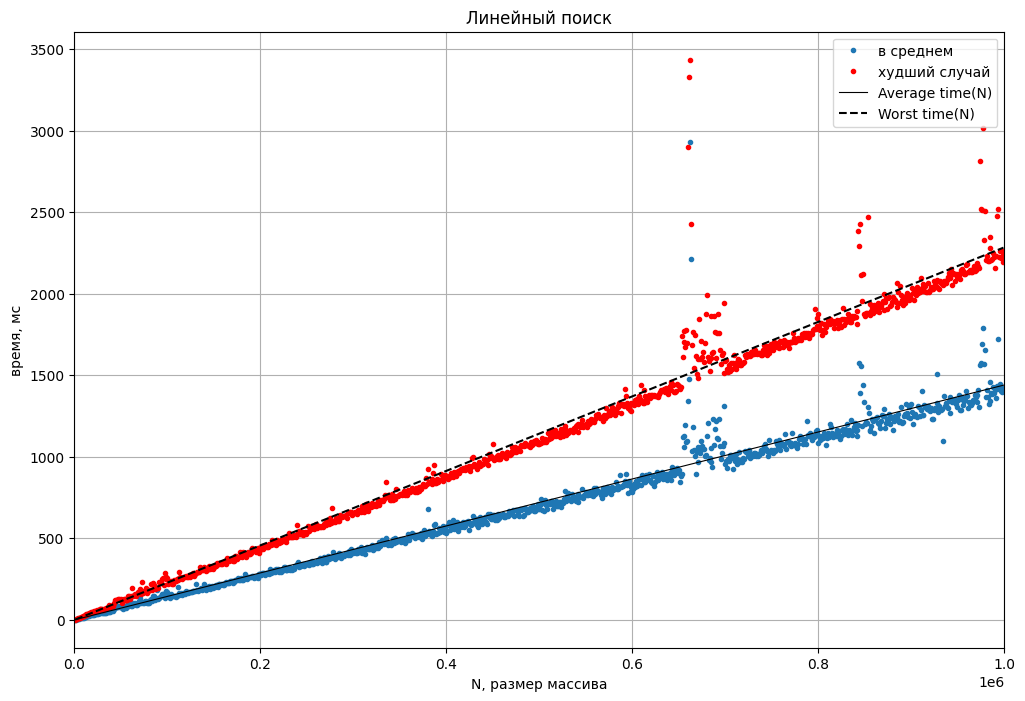

In [3]:
n = data1[0]
time = data1[1]
n2 = data2[0]
time2 = data2[1]

plt.figure(figsize=(12, 8))
plt.plot(n, time, '.', label='в среднем')
plt.plot(n2, time2, '.', color = 'red', label='худший случай')
plt.xlabel('N, размер массива')
plt.ylabel('время, мс')
plt.title('Линейный поиск')
k = (np.mean(n * time) - np.mean(n) * np.mean(time)) / (np.mean(n**2) - np.mean(n)**2)
k2 = (np.mean(n2 * time2) - np.mean(n2) * np.mean(time2)) / (np.mean(n2**2) - np.mean(n2)**2)
plt.plot(n, k*n, color = 'black', linewidth = 0.8, label = 'Average time(N)')
plt.plot(n2, k2*n2, color = 'black', linestyle = '--', label = 'Worst time(N)')

plt.ylim()
plt.xlim(0, 1000000)
plt.legend()
plt.grid()
plt.show()



Визуализация сложности бинарного поиска (в предварительно отсортированных массивах):

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


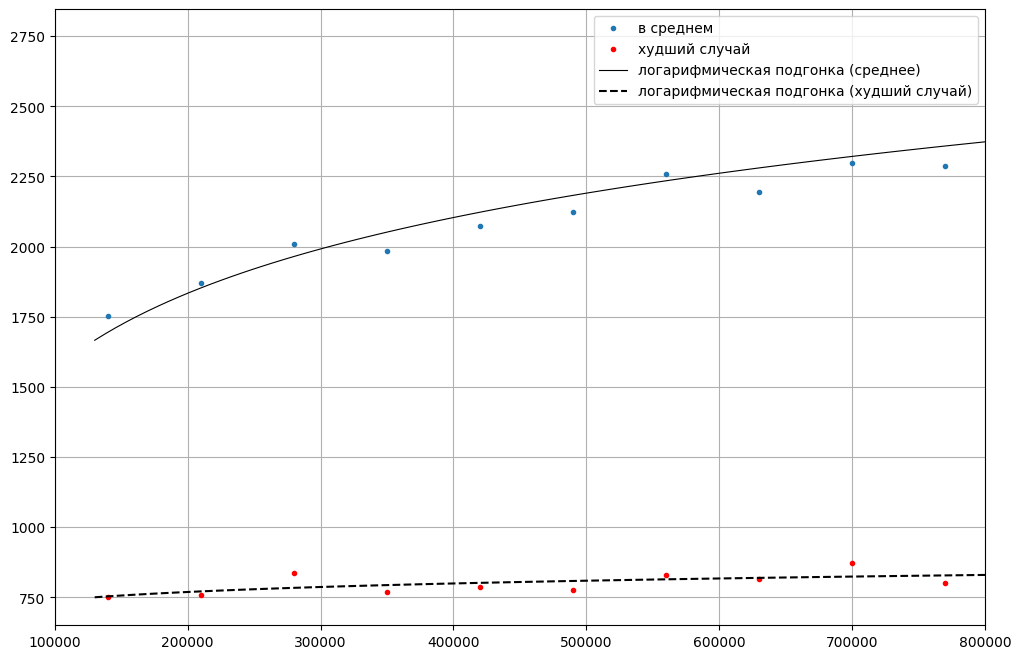

In [4]:
from scipy.optimize import curve_fit
n3 = data3[0]
n3 = n3[1:]
time3 = data3[1]
time3 = time3[1:]

n4 = data4[0]
n4 = n4[1:]
time4 = data4[1]
time4 = time4[1:]




def log_func(x, a, b, c):
    return a * np.log(b * x) + c

params3, _ = curve_fit(log_func, n3, time3)
params4, _ = curve_fit(log_func, n4, time4)

x_fit3 = np.linspace(130000, max(n3), 100)
y_fit3 = log_func(x_fit3, *params3)
x_fit4 = np.linspace(130000, max(n4), 100)
y_fit4 = log_func(x_fit4, *params4)

plt.figure(figsize=(12, 8))
plt.plot(n3, time3, '.', label='в среднем')
plt.plot(n4, time4, '.', color='red', label='худший случай')
plt.plot(x_fit3, y_fit3, color='black', linewidth=0.8, label='логарифмическая подгонка (среднее)')
plt.plot(x_fit4, y_fit4, color='black', linestyle='--', label='логарифмическая подгонка (худший случай)')


plt.ylim() 
plt.xlim(100000, 800000)
plt.legend()
plt.grid()
plt.show()


Сумма двух:

In [5]:
pp = 'output/afirst.txt'
pp_out = 'output/asecond.txt'


data5 = pd.read_csv(pp, sep=' ', header=None)
data6 = pd.read_csv(pp_out, sep=' ', header=None)


Поиск полным перебором:


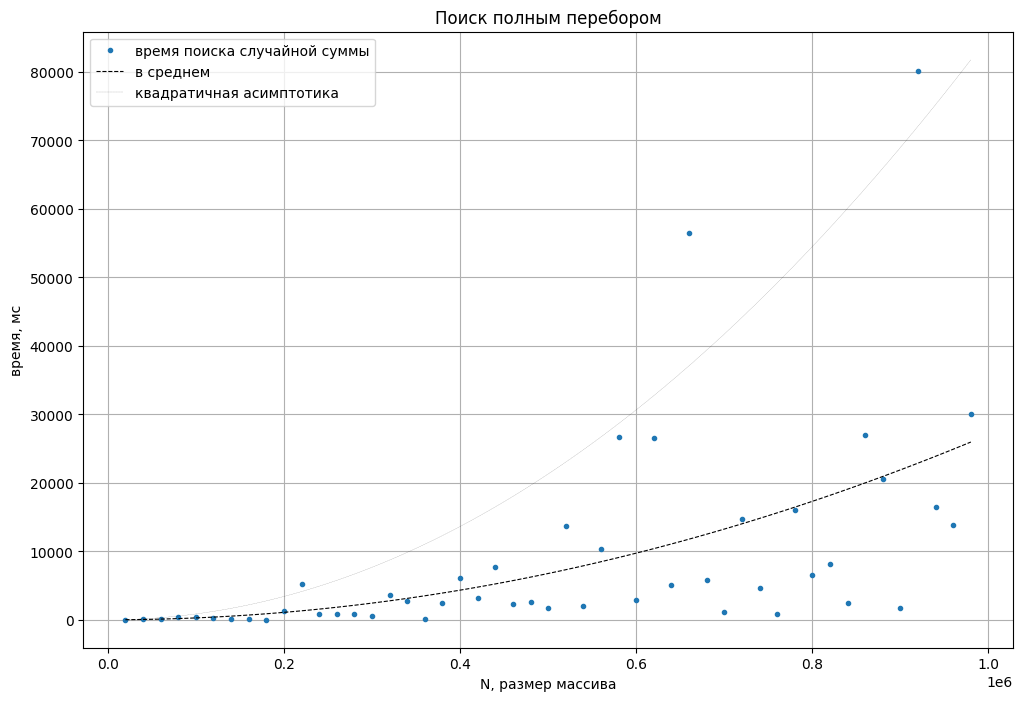

In [6]:
n5 = data5[0]
time5 = data5[1]

plt.figure(figsize=(12, 8))
plt.plot(n5, time5, '.', label='время поиска случайной суммы')
plt.xlabel('N, размер массива')
plt.ylabel('время, мс')
plt.title('Поиск полным перебором')


def quad_func(x, a):
    return a * x**2

params5, _ = curve_fit(quad_func, n5, time5)
x_fit5 = np.linspace(min(n5), max(n5), 100)
y_fit5 = quad_func(x_fit5, *params5)
plt.plot(x_fit5, y_fit5, color='black', linewidth=0.8, linestyle = '--', label='в среднем')

indexes = [10, 19, 21, 25, 28, 30, 32]
selected_n5 = n5[indexes]
selected_time5 = time5[indexes]
params_selected, _ = curve_fit(quad_func, selected_n5, selected_time5)
x_fit_selected = np.linspace(min(n5), max(n5), 100)
y_fit_selected = quad_func(x_fit_selected, *params_selected)
plt.plot(x_fit_selected, y_fit_selected, color='black', linewidth=0.1, linestyle='--', label='квадратичная асимптотика')

plt.ylim()
plt.xlim()
plt.legend()
plt.grid()
plt.show()



Линейный алгоритм для поиска в отсортированном массиве:

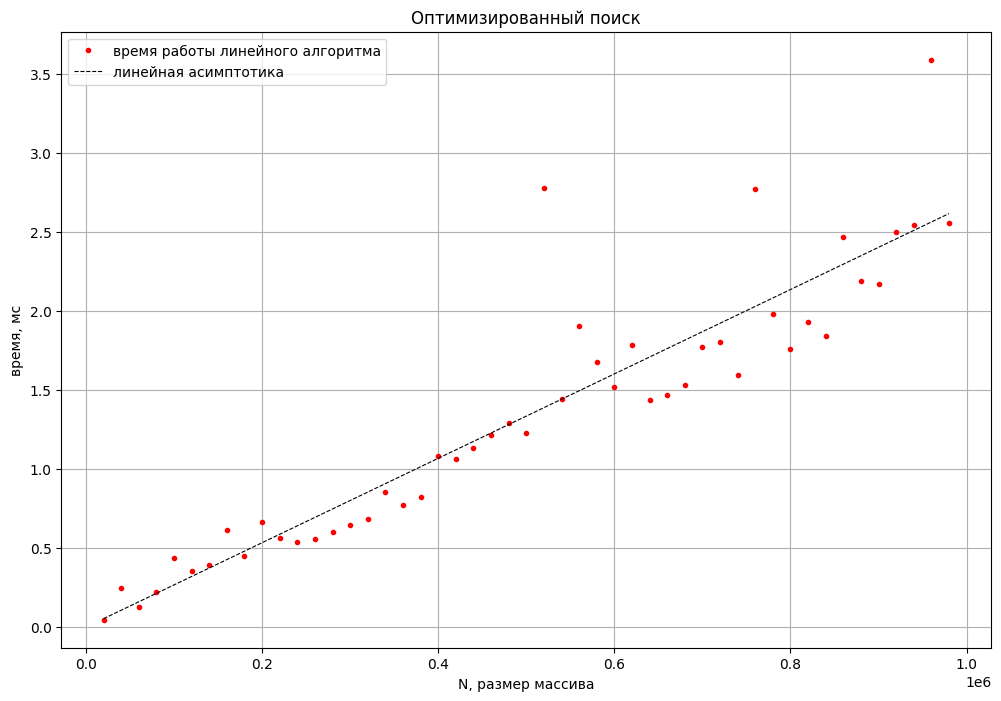

In [7]:
n6= data6[0]
time6 = data6[1]

plt.figure(figsize=(12, 8))
plt.plot(n6, time6, '.', color = 'red', label='время работы линейного алгоритма')
plt.xlabel('N, размер массива')
plt.ylabel('время, мс')
plt.title('Оптимизированный поиск')

k6 = (np.mean(n6 * time6) - np.mean(n6) * np.mean(time6)) / (np.mean(n6**2) - np.mean(n6)**2)
plt.plot(n6, k6*n6, color = 'black', linewidth=0.8, linestyle = '--', label='линейная асимптотика')

plt.ylim()
plt.xlim()
plt.legend()
plt.grid()
plt.show()

